# Tutorial for exact ECT computation 

*Warning: This is a work in progress. Proceed at your own risk.*

The goal of this section is so show available tools for exact computation of the ECT. 

In [1]:
from ect import ECT, EmbeddedGraph, EmbeddedCW,create_example_graph

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import networkx as nx

We can use the `EmbeddedGraph` class to find the angle normal to any pair of vertices in the graph, whether or not there is a connecting edge.  Setting `angle_labels_circle=True` in the plotting command will try to draw these on the circle. Note that this doesn't tend to do well for large inputs, but can be helpful for small examples. 

<Axes: >

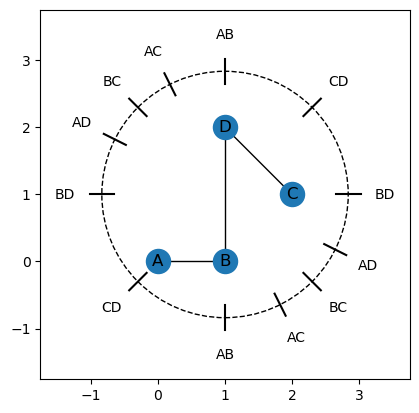

In [2]:
# Super simple graph 
G = EmbeddedGraph()
G.add_node('A', 0,0)
G.add_node('B', 1,0)
G.add_node('C', 2,1)
G.add_node('D', 1,2)
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('D', 'C')

G.plot(angle_labels_circle=True)


<Axes: >

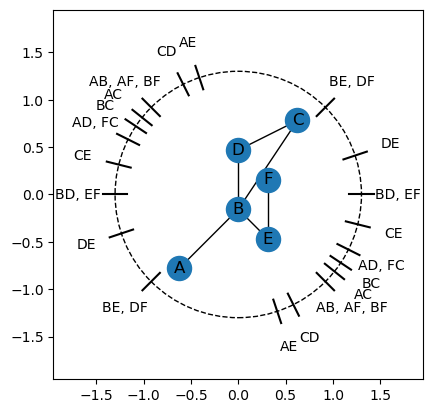

In [3]:
G = create_example_graph(centered=True)
G.rescale_to_unit_disk()


fig, ax = plt.subplots()
G.plot(ax = ax, angle_labels_circle=True)

We can extract the information directly for use in computation. 

[[        nan -0.78539816 -0.67474094 -0.46364761 -1.24904577 -0.78539816]
 [ 2.35619449         nan -0.5880026   0.         -2.35619449 -0.78539816]
 [ 2.46685171  2.55359005         nan  2.03444394  2.89661399  2.67794504]
 [ 2.67794504  3.14159265 -1.10714872         nan -2.8198421  -2.35619449]
 [ 1.89254688  0.78539816 -0.24497866  0.32175055         nan  0.        ]
 [ 2.35619449  2.35619449 -0.46364761  0.78539816  3.14159265         nan]]


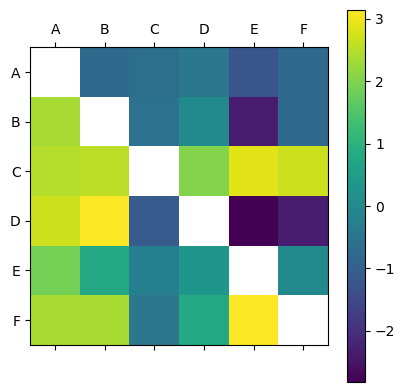

In [4]:
# If return type is `matrix`, the function returns the matrix of angles and the labels of the angles in the order of the rows/columns in the matrix 
M,Labels = G.get_all_angles(returntype='matrix')
print(M)

plt.matshow(M)
plt.xticks(range(len(Labels)), Labels)
plt.yticks(range(len(Labels)), Labels)
plt.colorbar()

This can also be returned as a dictionary, with keys given by angles (note the negative angle is not repeated), and value a list of the pairs of vertices associated. Note that in the case of more than one pair of vertices having the same normal angle, it is given as a list of all pairs. 

In [5]:
angles_dict = G.get_all_angles(returntype='dict')
angles_dict

{-0.7853981633974483: [('A', 'B'), ('A', 'F'), ('B', 'F')],
 -0.6747409422235526: [('A', 'C')],
 -0.4636476090008061: [('A', 'D'), ('F', 'C')],
 -1.2490457723982544: [('A', 'E')],
 -0.5880026035475675: [('B', 'C')],
 0.0: [('B', 'D'), ('E', 'F')],
 -2.356194490192345: [('B', 'E'), ('D', 'F')],
 2.0344439357957027: [('C', 'D')],
 2.896613990462929: [('C', 'E')],
 -2.819842099193151: [('D', 'E')]}